<a href="https://colab.research.google.com/github/NishaB65/Bitcoin-prediction-using-Long-Short-Term-Memory-LSTM-/blob/main/Bitcoin_Prediction_using_Long_Short_Term_Memory_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Prediction using Long-Short Term Memory (LSTM)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
data= pd.read_csv('/content/Bitcoin.csv')
data.head()

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
0,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_eur,1996.72,2029.99,-1.638924,2005.50,2005.56,1950.00,2063.73,2314.500750,2017-05-31 14:59:36,2017-05-31 14:59:36
1,2017-05-31,2017-06-01 00:00:00,bitflyer,btc_jpy,267098.00,269649.00,-0.946045,267124.00,267267.00,267124.00,267267.00,70922.880112,2017-05-31 14:59:36,2017-05-31 14:59:36
2,2017-05-31,2017-06-01 00:00:00,korbit,btc_krw,3003500.00,3140000.00,-4.347134,3003500.00,3004000.00,3002000.00,3209500.00,6109.752872,2017-05-31 14:59:36,2017-05-31 14:59:36
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36


In [ ]:
data['rpt_key'].value_counts()

btc_usd       125438
btc_eur        62719
btc_jpy        62719
btc_krw        62719
etc_krw        62719
eth_btc        62719
eth_krw        62719
fx_btc_jpy     62719
ltc_usd        62719
Name: rpt_key, dtype: int64

In [ ]:
df= data.loc[(data['rpt_key'] == 'btc_usd')]
df.head()

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36
15,2017-06-01,2017-06-01 00:01:00,bitstamp,btc_usd,2248.39,2242.44,0.265336,2247.77,2248.38,2154.28,2293.46,13701.698603,2017-05-31 15:00:36,2017-05-31 15:00:36
16,2017-06-01,2017-06-01 00:01:00,okcoin,btc_usd,2320.42,2228.40,4.129420,2320.99,2321.49,2129.78,2322.00,4260.261516,2017-05-31 15:00:36,2017-05-31 15:00:36
23,2017-06-01,2017-06-01 00:02:00,bitstamp,btc_usd,2248.35,2238.58,0.436437,2248.35,2248.69,2154.28,2293.46,13742.110913,2017-05-31 15:01:36,2017-05-31 15:01:36


In [ ]:
df= df.reset_index(drop= True)
df['datetime']= pd.to_datetime(df['datetime_id'])
df = df.loc[df['datetime'] > pd.to_datetime('2017-06-28 00:00:00')]

In [ ]:
df= df[['datetime', 'last', 'bid', 'ask', 'low', 'high', 'volume']]
df

,datetime,last,bid,ask,low,high,volume
77762,2017-06-28 00:01:00,2344.00,2335.01,2343.89,2307.00,2473.19,20719.583592
77763,2017-06-28 00:01:00,2499.39,2495.00,2499.33,2444.00,2780.62,2265.557866
77764,2017-06-28 00:02:00,2337.18,2337.18,2340.00,2307.00,2473.19,20732.082581
77765,2017-06-28 00:02:00,2492.76,2492.76,2495.00,2444.00,2780.62,2262.618866
77766,2017-06-28 00:03:00,2335.02,2335.01,2335.02,2307.00,2473.19,20665.357191
...,...,...,...,...,...,...,...
125433,2017-07-14 13:16:00,2394.03,2394.35,2405.72,2378.02,2529.20,1111.540000
125434,2017-07-14 13:17:00,2320.47,2320.48,2322.55,2307.46,2413.60,7969.263583
125435,2017-07-14 13:17:00,2394.03,2394.42,2405.69,2378.02,2529.20,1111.540000
125436,2017-07-14 13:18:00,2320.47,2320.57,2322.55,2307.46,2413.60,7968.970715


In [ ]:
df= df[['last']]

In [ ]:
dataset= df.values
dataset= dataset.astype('float32')

In [ ]:
dataset

array([[2344.  ],
       [2499.39],
       [2337.18],
       ...,
       [2394.03],
       [2320.47],
       [2394.03]], dtype=float32)

In [ ]:
scaler= MinMaxScaler(feature_range= (0, 1))
dataset= scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.1997695 ],
       [0.49828053],
       [0.18666792],
       ...,
       [0.29587936],
       [0.15456724],
       [0.29587936]], dtype=float32)

In [ ]:
dataset.shape

(47676, 1)

In [ ]:
train_size= int(len(dataset) * 0.67)
test_size= len(dataset) - train_size
train, test= dataset[0: train_size, :], dataset[train_size: len(dataset), :]
print(len(train), len(test))

31942 15734


In [ ]:
def create_dataset(dataset, look_back= 1):
  dataX, dataY= [], []
  for i in range(len(dataset) - look_back-1):
    a = dataset[i: (i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back= 10
x_train, y_train= create_dataset(train, look_back= look_back)
x_test, y_test= create_dataset(test, look_back= look_back)

In [ ]:
x_train

array([[0.1997695 , 0.49828053, 0.18666792, ..., 0.4975314 , 0.19973087,
        0.4860053 ],
       [0.49828053, 0.18666792, 0.4855442 , ..., 0.19973087, 0.4860053 ,
        0.18442059],
       [0.18666792, 0.4855442 , 0.18251848, ..., 0.4860053 , 0.18442059,
        0.48598576],
       ...,
       [0.53376245, 0.6943617 , 0.53105354, ..., 0.7082124 , 0.5205841 ,
        0.7081547 ],
       [0.6943617 , 0.53105354, 0.70823145, ..., 0.5205841 , 0.7081547 ,
        0.52665424],
       [0.53105354, 0.70823145, 0.5332055 , ..., 0.7081547 , 0.52665424,
        0.7081547 ]], dtype=float32)

In [ ]:
y_train

array([0.18442059, 0.48598576, 0.19208527, ..., 0.52665424, 0.7081547 ,
       0.5206418 ], dtype=float32)

In [ ]:
x_train= np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test= np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, x_train, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
125/125 - 2s - loss: 0.0945 - 2s/epoch - 18ms/step
Epoch 2/100
125/125 - 1s - loss: 0.0247 - 607ms/epoch - 5ms/step
Epoch 3/100
125/125 - 1s - loss: 0.0243 - 661ms/epoch - 5ms/step
Epoch 4/100
125/125 - 1s - loss: 0.0238 - 629ms/epoch - 5ms/step
Epoch 5/100
125/125 - 1s - loss: 0.0234 - 624ms/epoch - 5ms/step
Epoch 6/100
125/125 - 1s - loss: 0.0230 - 662ms/epoch - 5ms/step
Epoch 7/100
125/125 - 1s - loss: 0.0227 - 699ms/epoch - 6ms/step
Epoch 8/100
125/125 - 1s - loss: 0.0225 - 633ms/epoch - 5ms/step
Epoch 9/100
125/125 - 1s - loss: 0.0223 - 704ms/epoch - 6ms/step
Epoch 10/100
125/125 - 1s - loss: 0.0222 - 752ms/epoch - 6ms/step
Epoch 11/100
125/125 - 1s - loss: 0.0221 - 731ms/epoch - 6ms/step
Epoch 12/100
125/125 - 1s - loss: 0.0220 - 753ms/epoch - 6ms/step
Epoch 13/100
125/125 - 1s - loss: 0.0220 - 724ms/epoch - 6ms/step
Epoch 14/100
125/125 - 1s - loss: 0.0219 - 713ms/epoch - 6ms/step
Epoch 15/100
125/125 - 1s - loss: 0.0219 - 712ms/epoch - 6ms/step
Epoch 16/100
125/125 

In [ ]:
trainPredict= model.predict(x_train)
testPredict= model.predict(x_test)

492/492 [==============================] - 1s 1ms/step


In [ ]:
trainPredict= scaler.inverse_transform(trainPredict)
y_train= scaler.inverse_transform([y_train])
testPredict= scaler.inverse_transform(testPredict)
y_test= scaler.inverse_transform([y_test])

In [ ]:
trainScore= math.sqrt(mean_squared_error(y_train[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore= math.sqrt(mean_squared_error(y_test[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 76.71 RMSE
Test Score: 148.33 RMSE


In [ ]:
trainPredictPlot= np.empty_like(dataset)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :]= trainPredict

In [ ]:
testPredictPlot= np.empty_like(dataset)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :]= testPredict

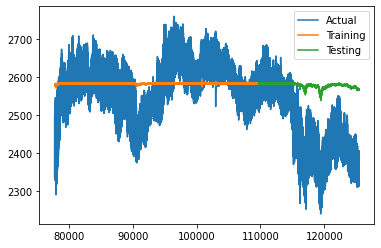

In [ ]:
plt.plot(df['last'], label= 'Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns= ["close"], index= df.index).close, label= 'Training')
plt.plot(pd.DataFrame(testPredictPlot, columns= ["close"], index= df.index).close, label= 'Testing')
plt.legend(loc= 'best')
plt.show()